## Arithmetical Operations

In [1]:
import numpy as np
import cv2

image = cv2.imread('images/cycle.jpg')
cv2.imshow("Original", image)
print("max of 255: " + str(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: " + str(cv2.subtract(np.uint8([50]), np.uint8([100]))))
print("wrap around: " + str(np.uint8([200]) + np.uint8([100])))
print("wrap around: " + str(np.uint8([50]) - np.uint8([100])))
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
cv2.imshow("Added", added)
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
cv2.imshow("Subtracted", subtracted)
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


### Bitwise Operator

In [2]:
import numpy as np
import cv2
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)
cv2.waitKey(0)
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)
cv2.waitKey(0)
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)
bitwiseNot = cv2.bitwise_not(circle)
cv2.imshow("NOT", bitwiseNot)
if(cv2.waitKey(5)):
 cv2.destroyAllWindows()

1. AND: A bitwise AND is true if and only if both pixels are greater than zero.
2. OR: A bitwise OR is true if either of the two pixels are greater than zero.
3. XOR: A bitwise XOR is true if and only if the two pixels are greater than zero, but not both.
4. NOT: A bitwise NOT inverts the “on” and “off” pixels in an image.

### Masking

In [2]:
import cv2
import numpy as np

img = cv2.imread("images/cycle.jpg")
cv2.imshow("Wave",img)
cv2.waitKey(0)
#we readed the image

mask = np.zeros(img.shape[:2],dtype="uint8")
(cx,cy) = (img.shape[1]//2,img.shape[0]//2)
cv2.rectangle(mask,(cx-75,cy-75),(cx+75,cy+75),255,-1)
cv2.imshow("Mask",mask)
cv2.waitKey(0) 

masked = cv2.bitwise_and(img,img,mask=mask)
cv2.imshow("Masked",masked)
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

In [7]:
import numpy as np
import cv2

image = cv2.imread('images/cycle.jpg')
cv2.imshow("Original", image)
mask = np.zeros(image.shape[:2], dtype = "uint8")

(cX, cY) = (image.shape[1] / 2, image.shape[0] / 2)
r = (int(cX), int(cY))
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, r, 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
cv2.imshow("Mask", mask)
cv2.imshow("Mask Applied to Image", masked)
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## Splitting And Merging Color Channels

In [1]:
import numpy as np
import cv2

image = cv2.imread('images/cycle.jpg')

(B, G, R) = cv2.split(image)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

merged = cv2.merge([B, G, R])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import numpy as np
import cv2

image = cv2.imread('images/cycle.jpg')

(B, G, R) = cv2.split(image)

zeros = np.zeros(image.shape[:2], dtype = "uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## Colorspaces

In [3]:
import numpy as np
import cv2

image = cv2.imread('images/cycle.jpg')
cv2.imshow("Original", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b*", lab)
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## Histograms

* A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255.
### Using Opencv to compute histograms
```cv2.calcHist(images,channels,mask,histSize,ranges)```
1. images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].
2. channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0,1,2].
3. mask:  Here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.
4. histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32,32,32].
5. ranges: The range of possible pixel values. Normally, this is [0, 256] for each channel, but if you are using a color space other than RGB (such as HSV), the ranges might be different.

### GrayScale Histogram

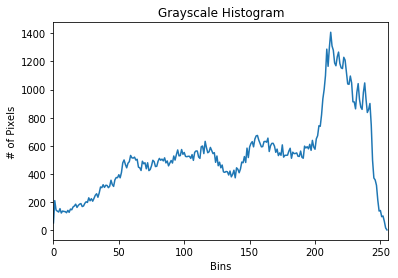

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread('images/cycle.jpg')
cv2.imshow("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Image", gray)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()

## Color Histograms

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


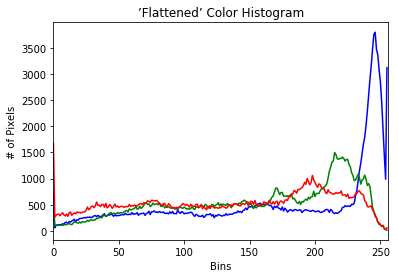

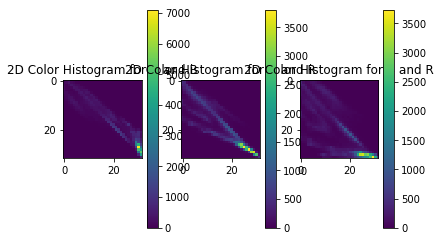

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('images/cycle.jpg')
cv2.imshow("Original", image)
chans = cv2.split(image)
colors = ("b", "g", "r")

plt.figure()
plt.title("’Flattened’ Color Histogram")

plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")

plt.colorbar(p)
ax = fig.add_subplot(1,3,2)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
ax = fig.add_subplot(1,3,3)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
print ("2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))
hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))
plt.show()
if(cv2.waitKey(0)):
 cv2.destroyAllWindows()